* Creator: Chike Uduku
* Created: 04/05/2019
* Revision: 1.0

* SUMMARY:
    * As was expected, we observe that temperature increases as we get closer to the equator (latitude of 0) and decreases as we get further away.
    * Wind speed also appears to decrease as we get closer to the equator and increase as we move away from the equator
    * Cloudiness does not appear to be affected by proximity to the equator

In [31]:
#Import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import random
import requests
from citipy import citipy
from config import api_Key

In [2]:
#Generate a list of coordinates
cdnates = [(random.uniform(-90,90),random.uniform(-180,180))for g in range(1500) ]

In [3]:
#Now that we have a list of coordinates, let's use citipy module to find cities that are close to those coordinates
cities= [] #list to house city names
countryCodes = []#list to house countries for the respective city names

#Build city list
for (lat,lng) in cdnates:
        if citipy.nearest_city(lat,lng).city_name not in cities:
            cities.append(citipy.nearest_city(lat,lng).city_name)
            countryCodes.append(citipy.nearest_city(lat,lng).country_code)

In [4]:
#show number of cities to verify that there are at least 500 of them
len(cities)

617

In [5]:
#Setup Dataframe and display structure
city_df = pd.DataFrame({"City":cities})
city_df["Cloudines"] = ""
city_df["Country"] = pd.Series(countryCodes)
city_df["Date"] = ""
city_df["Humidity"] = ""
city_df["Lat"] = ""
city_df["Lng"] = ""
city_df["Max Temp"] = ""
city_df["Wind Speed"] = ""
city_df.head()

,City,Cloudines,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,qaanaaq,,gl,,,,,,
1,saint-philippe,,re,,,,,,
2,mingaora,,pk,,,,,,
3,redlands,,us,,,,,,
4,torbay,,ca,,,,,,


In [6]:
#Define Base URL
base_url = "http://api.openweathermap.org/data/2.5/weather?q="

#Now that we have our base url, let's iterate through the data frame to populate the other fields for the respective cities
for i in range(len(city_df.index)):
    #build request url
    rqst_url = base_url + city_df.iloc[i,0] + "," + city_df.iloc[i,2] + "&appid=" + api_Key 
    #Print to terminal
    print(f'Retrieving result for index {i}: city of {city_df.iloc[i,0]}\n\r-------------------\n\r')
    #Get query responce via API
    rspns = requests.get(rqst_url).json()
    
    #Handle scenario where no result was returned for the city being queried by filling all columns for the respective row
    #with a "NaN"
    if(rspns["cod"] == '404'):
        city_df.iloc[i,1] = "NaN" #Cloudiness
        city_df.iloc[i,2] = "NaN" #Country
        city_df.iloc[i,3] = "NaN" #Date
        city_df.iloc[i,4] = "NaN" #Humidity
        city_df.iloc[i,5] = "NaN" #Latitude
        city_df.iloc[i,6] = "NaN" #Longitude
        city_df.iloc[i,7] = "NaN" #Max temp
        city_df.iloc[i,8] = "NaN" #Wind Speed
    #if results were returned for the city being queried, populate the respective columns for that city row
    else:
        city_df.iloc[i,1] = rspns["clouds"]["all"] #Cloudiness
        city_df.iloc[i,2] = rspns["sys"]["country"] #Country
        city_df.iloc[i,3] = rspns["dt"] #Date
        city_df.iloc[i,4] = rspns["main"]["humidity"] #Humidity
        city_df.iloc[i,5] = rspns["coord"]["lat"] #Latitude
        city_df.iloc[i,6] = rspns["coord"]["lon"] #Longitude
        city_df.iloc[i,7] = rspns["main"]["temp_max"] #Max temp
        city_df.iloc[i,8] = rspns["wind"]["speed"] #Wind Speed

Retrieving result for index 0: city of qaanaaq
-------------------

Retrieving result for index 1: city of saint-philippe
-------------------

Retrieving result for index 2: city of mingaora
-------------------

Retrieving result for index 3: city of redlands
-------------------

Retrieving result for index 4: city of torbay
-------------------

Retrieving result for index 5: city of mar del plata
-------------------

Retrieving result for index 6: city of yellowknife
-------------------

Retrieving result for index 7: city of tupik
-------------------

Retrieving result for index 8: city of katsuura
-------------------

Retrieving result for index 9: city of barrow
-------------------

Retrieving result for index 10: city of marawi
-------------------

Retrieving result for index 11: city of grand river south east
-------------------

Retrieving result for index 12: city of vizinga
-------------------

Retrieving result for index 13: city of butaritari
-------------------

Retrieving 

Retrieving result for index 117: city of conceicao do araguaia
-------------------

Retrieving result for index 118: city of safaga
-------------------

Retrieving result for index 119: city of buraydah
-------------------

Retrieving result for index 120: city of saldanha
-------------------

Retrieving result for index 121: city of kaka
-------------------

Retrieving result for index 122: city of alyangula
-------------------

Retrieving result for index 123: city of havre-saint-pierre
-------------------

Retrieving result for index 124: city of praia da vitoria
-------------------

Retrieving result for index 125: city of teguise
-------------------

Retrieving result for index 126: city of collie
-------------------

Retrieving result for index 127: city of leningradskiy
-------------------

Retrieving result for index 128: city of kavieng
-------------------

Retrieving result for index 129: city of senanga
-------------------

Retrieving result for index 130: city of alghero
--

Retrieving result for index 233: city of matara
-------------------

Retrieving result for index 234: city of carutapera
-------------------

Retrieving result for index 235: city of castro
-------------------

Retrieving result for index 236: city of yumen
-------------------

Retrieving result for index 237: city of upernavik
-------------------

Retrieving result for index 238: city of los llanos de aridane
-------------------

Retrieving result for index 239: city of suez
-------------------

Retrieving result for index 240: city of altar
-------------------

Retrieving result for index 241: city of cianorte
-------------------

Retrieving result for index 242: city of bengkulu
-------------------

Retrieving result for index 243: city of meilu
-------------------

Retrieving result for index 244: city of ngoro
-------------------

Retrieving result for index 245: city of marcona
-------------------

Retrieving result for index 246: city of igarka
-------------------

Retrieving re

Retrieving result for index 349: city of coquimbo
-------------------

Retrieving result for index 350: city of soyaniquilpan
-------------------

Retrieving result for index 351: city of poputnaya
-------------------

Retrieving result for index 352: city of araouane
-------------------

Retrieving result for index 353: city of kyren
-------------------

Retrieving result for index 354: city of goya
-------------------

Retrieving result for index 355: city of velsk
-------------------

Retrieving result for index 356: city of geraldton
-------------------

Retrieving result for index 357: city of severo-kurilsk
-------------------

Retrieving result for index 358: city of porto novo
-------------------

Retrieving result for index 359: city of sasykoli
-------------------

Retrieving result for index 360: city of aklavik
-------------------

Retrieving result for index 361: city of mackay
-------------------

Retrieving result for index 362: city of grindavik
-------------------

Ret

Retrieving result for index 466: city of sobolevo
-------------------

Retrieving result for index 467: city of tual
-------------------

Retrieving result for index 468: city of florianopolis
-------------------

Retrieving result for index 469: city of otradinskiy
-------------------

Retrieving result for index 470: city of yenagoa
-------------------

Retrieving result for index 471: city of xuanwu
-------------------

Retrieving result for index 472: city of novyy urengoy
-------------------

Retrieving result for index 473: city of thung song
-------------------

Retrieving result for index 474: city of solnechnyy
-------------------

Retrieving result for index 475: city of el balyana
-------------------

Retrieving result for index 476: city of college
-------------------

Retrieving result for index 477: city of rawson
-------------------

Retrieving result for index 478: city of tosya
-------------------

Retrieving result for index 479: city of north bend
-------------------

Retrieving result for index 582: city of casino
-------------------

Retrieving result for index 583: city of okhotsk
-------------------

Retrieving result for index 584: city of healdsburg
-------------------

Retrieving result for index 585: city of patea
-------------------

Retrieving result for index 586: city of formoso do araguaia
-------------------

Retrieving result for index 587: city of avera
-------------------

Retrieving result for index 588: city of tshikapa
-------------------

Retrieving result for index 589: city of quatre cocos
-------------------

Retrieving result for index 590: city of hongjiang
-------------------

Retrieving result for index 591: city of parfenyevo
-------------------

Retrieving result for index 592: city of burica
-------------------

Retrieving result for index 593: city of tsybli
-------------------

Retrieving result for index 594: city of rundu
-------------------

Retrieving result for index 595: city of flin flon
-------------------

R

In [17]:
#Drop cities which returned no results and preview new data frame
updatedCity_df = city_df[~city_df.isin(['NaN', 'NaT']).any(axis=1)]
updatedCity_df.head()

,City,Cloudines,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,qaanaaq,0,GL,1554520783,67,77.48,-69.36,252.567,3.07
1,saint-philippe,0,RE,1554520692,53,-21.36,55.77,299.15,3.1
2,mingaora,48,PK,1554520530,91,34.78,72.36,284.067,0.82
3,redlands,90,US,1554520507,58,34.06,-117.19,290.15,3.1
4,torbay,40,CA,1554520645,68,47.66,-52.73,270.37,10.3


In [18]:
#Show number of cities in updated data frame
updatedCity_df["City"].count()

549

* Plots

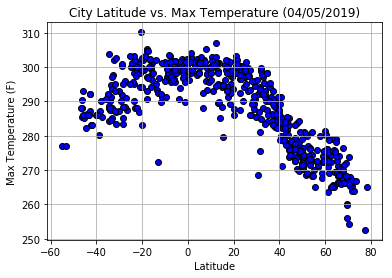

In [25]:
#Latitude vs Max Temp plot
plt.scatter(updatedCity_df["Lat"],updatedCity_df["Max Temp"],marker = 'o',facecolors = "blue",edgecolors = "black" )
plt.title("City Latitude vs. Max Temperature (04/05/2019)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.savefig("Outputs/Lat_vs_MaxTemp.png")
plt.show()

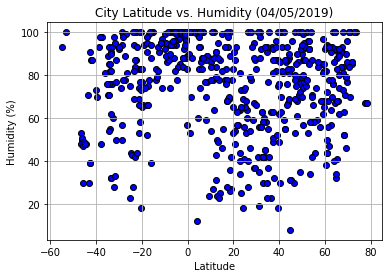

In [26]:
#Latitude vs Humidity plot
plt.scatter(updatedCity_df["Lat"],updatedCity_df["Humidity"],marker = 'o',facecolors = "blue",edgecolors = "black" )
plt.title("City Latitude vs. Humidity (04/05/2019)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig("Outputs/Lat_vs_Humidity.png")
plt.show()

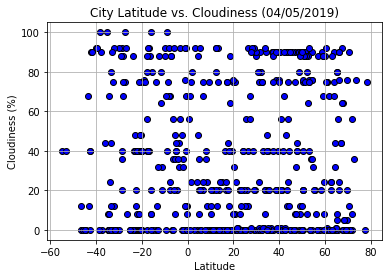

In [27]:
#Latitude vs Cloudiness plot
plt.scatter(updatedCity_df["Lat"],updatedCity_df["Cloudines"],marker = 'o',facecolors = "blue",edgecolors = "black" )
plt.title("City Latitude vs. Cloudiness (04/05/2019)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig("Outputs/Lat_vs_Cloudiness.png")
plt.show()

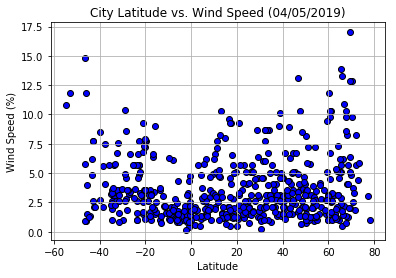

In [28]:
#Latitude vs Wind Speed plot
plt.scatter(updatedCity_df["Lat"],updatedCity_df["Wind Speed"],marker = 'o',facecolors = "blue",edgecolors = "black" )
plt.title("City Latitude vs. Wind Speed (04/05/2019)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (%)")
plt.grid()
plt.savefig("Outputs/Lat_vs_Wind Speed.png")
plt.show()